<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression**
*From scratch using Python*

Linear Regression attempts to model the relationship between one or more features and a response by fitting a linear equation to the observed data.

Linear regression is a statistical method for modeling relationships between a dependent variable with a given set of independent variables.

### Importing necessary libraries:
Numpy, pandas and matplotlib.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Using Google Drive Mount to access dataset files.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data Frame

The famous library 'pandas' is used to load the data frame from the csv files provided.

Data Frame for training dataset.

In [20]:
pd.options.display.max_columns = 5
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Linear and Polynomial Regression/Linear_train.csv')
df_train = df_train.drop(columns='Unnamed: 0')      # Dropping the row containing indices by default
df_train.head()

,A,B,...,T,label
0,-9.989516,1564.957586,...,29.107896,311.232491
1,-17.591800,1559.053039,...,-32.565844,6393.112342
2,-28.321695,1305.900952,...,-34.332357,2601.046223
3,-40.471241,1612.746996,...,33.561233,13572.118106
4,-36.525271,1852.275617,...,-36.320202,-5462.446898


Data Frame for testing dataset.

In [21]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Linear and Polynomial Regression/Linear_test.csv')
df_test = df_test.drop(columns=['Unnamed: 0'])      # Dropping the row containing indices by default
df_test.head()

,A,B,...,T,label
0,40.790740,1187.897579,...,-28.154864,-163.522723
1,47.968749,1498.588679,...,-24.206545,6484.664510
2,9.762564,1316.354415,...,36.688611,2393.818082
3,6.414629,1895.586749,...,-34.048583,-9397.072355
4,-4.112012,1130.920162,...,-22.476663,10487.323575


## Converting the Data Frame to NumPy Arrays

Using the function `.to_numpy()` to conver the Data Frame to numpy array and then slicing the array to separate features from the label.

`X_train` --> Array with all features of training dataset.

`Y_train` --> Array with all labels of training dataset.

`X_test` --> Array with all features of testing dataset.

`Y_test` --> Array with all labels of testing dataset.

In [22]:
X_train = df_train.to_numpy()
# Number of features:
n = (X_train.shape[1] - 1)
# Number of training examples:
m = X_train.shape[0]
Y_train = X_train[ : , -1]
Y_train = Y_train.reshape(X_train.shape[0], 1)
X_train = X_train[ : , :n]

In [23]:
X_test = df_test.to_numpy()
Y_test = (X_test[ : , -1])
Y_test = Y_test.reshape(X_test.shape[0], 1)
X_test = X_test[ : , :n]

### Normalising data:

After reviewing the data, I found that all the features were not close to each other, rather they were far apart in values. This will cause gradient descent to be slow.

To fix this problem, the data will be normalised.

For normalisation, mean value of every feature will be subtracted from its value and then it will be scaled by the standard deviation of the respective feature. `.mean` and `.std functions` will be used for the same.

`normalise(X)` --> function for normalisation.

`mu` --> Mean of all the features.

`sigma` --> Standard deviation of all the features.

`X_train_norm` --> Normalised training dataset features.

`X_test_norm` --> Normalised testing dataset features.

In [24]:
def normalise(X):
    mu = np.mean(X, axis = 0)       # Mean (Column wise)
    sigma = np.std(X, axis = 0)     # Standard Deviation (Column wise)
    X = X-mu
    X = X/sigma
    return X

In [25]:
X_train_norm = normalise(X_train)
X_test_norm = normalise(X_test)

### Visualising the data:

Since there are 20 features and all of them cannot be visualised in the same plot, every feature will be plotted separately for visualisation.

Here, feature A has been visualised.

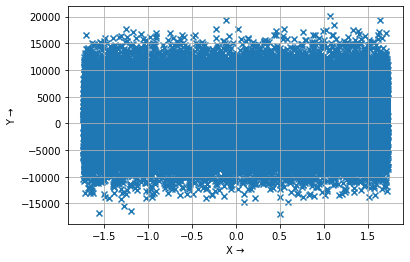

In [26]:
plt.grid(True)
plt.scatter(X_train_norm[:, 1],Y_train, marker = "x")         # The plot is for feature A vs Y
plt.xlabel('X →')
plt.ylabel('Y →')
plt.show()

## Hypothesis:

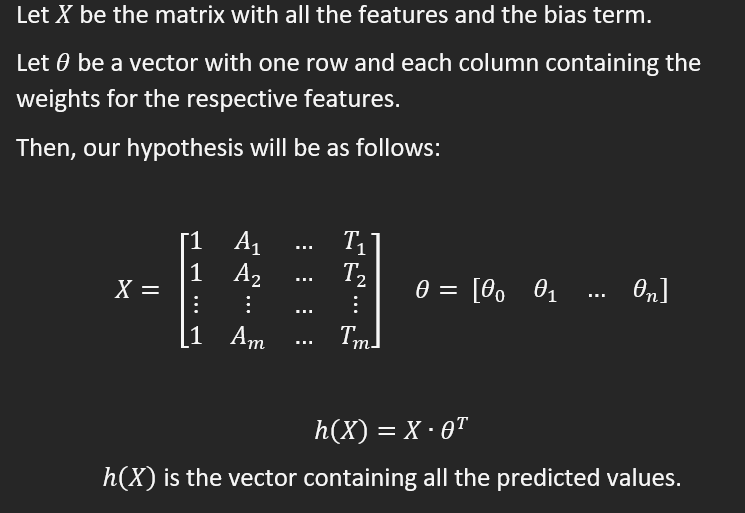

### Adding the bias term to the feature array:

In [27]:
extra_column = np.ones((m,1))
# Adding an extra column of 1's for the bias term
X_train_norm = np.c_[extra_column, X_train_norm]
extra_column = np.ones((X_test_norm.shape[0],1))     # Because test cases are 10,000 while training examples are 50,000
X_test_norm = np.c_[extra_column, X_test_norm]

Initialising θ to all zero.

In [28]:
theta = np.zeros((1, X_train_norm.shape[1]))    # Vector containing all weights. Initialised to 0.

## Training the Model:
Gradient descent and Back propogation will be used to minimise the Cost Function.

α is Learning Rate.

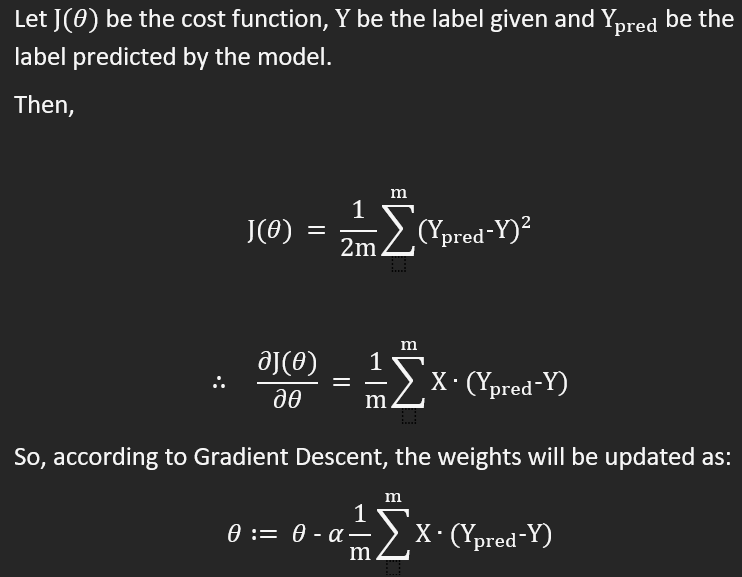

In [29]:
def train_lr (X, Y, X_test, theta, no_of_iterations, learning_rate):
    m_train = X.shape[0]

    cost_arr = np.empty((1, no_of_iterations), float)

    for t in range(no_of_iterations):
        Y_pred = np.dot(X, theta.T)

        loss = (np.sum(Y_pred-Y)**2)/(2*m_train)

        grad = (np.sum(X*(Y_pred-Y), axis=0))/m_train

        cost_arr[(0,t)] = loss

        theta = theta - (learning_rate*grad)

        Y_test = np.dot(X_test, theta.T)

        if (t+1)==100 or (t+1)==300 or (t+1)==500 or (t+1)==750 or (t+1)==1000 or (t+1)==1500 or(t+1)==2000 or (t+1)==2500:
            print(f"After {t+1} iteraions:")
            print("Loss: ", loss)
            plt.scatter( X[:,5], Y, c='r', marker='x' )        # Change the column of X to obtain graph of different features
            plt.plot(X_test[:,5], Y_test , '-o')
            plt.xlabel('X →')
            plt.ylabel('Y →')
            plt.show()

    print("This plot shows the variation of the cost with the no. of iteraions, the cost seems to be approaching 0 as the no. of iteraions increases, as expected")
    plt.grid(True)
    plt.scatter(range(no_of_iterations), cost_arr, marker = "x")
    plt.xlabel('X →')
    plt.ylabel('Y →')
    plt.show()

    return theta

We set α (Learning Rate) to 0.03 and we iterate the model 2500 times for training.

After 100 iteraions:
Loss:  142011077.48847514


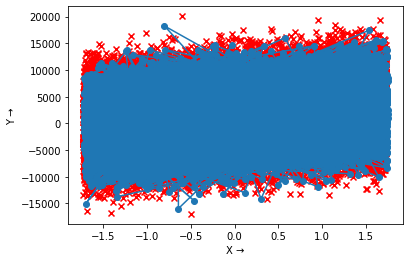

After 300 iteraions:
Loss:  726.132590084977


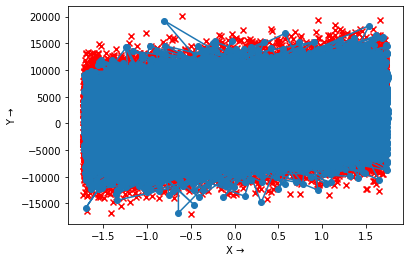

After 500 iteraions:
Loss:  0.0037128690735130196


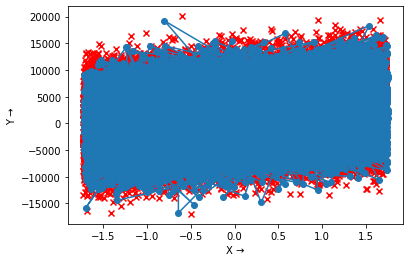

After 750 iteraions:
Loss:  9.027721835687097e-10


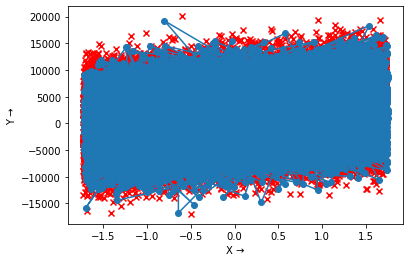

After 1000 iteraions:
Loss:  2.2028221270493605e-16


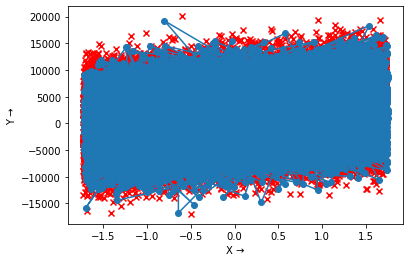

After 1500 iteraions:
Loss:  3.245168127439081e-19


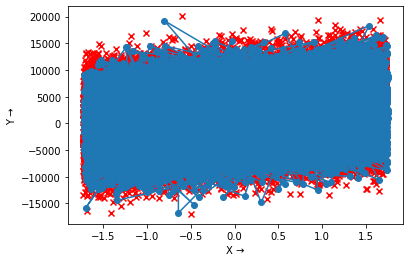

After 2000 iteraions:
Loss:  3.245168127439081e-19


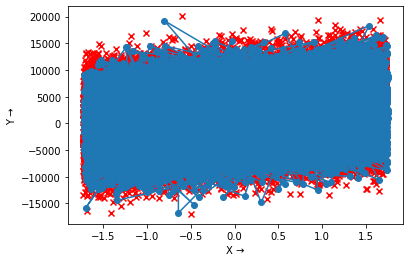

After 2500 iteraions:
Loss:  3.245168127439081e-19


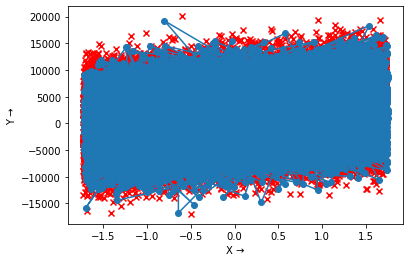

This plot shows the variation of the cost with the no. of iteraions, the cost seems to be approaching 0 as the no. of iteraions increases, as expected


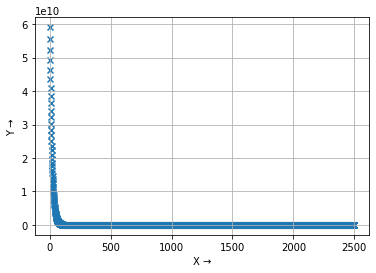

The weights will be (from θ_0 to θ_21) 
 [[ 1537.40898405   374.84297316    57.66355878  -780.65390906
    230.87239175  1068.01409067    87.20446456   548.72479312
   -837.63793397    34.67370773   662.52453914   896.38283869
     86.47649282 -2631.25005955   980.57481622  1301.44464438
   1476.95436293   693.42415381   -29.25523734  2746.11651838
    723.36220031]]


In [30]:
global theta
theta = train_lr(X_train_norm, Y_train, X_test_norm, theta, 2500, 0.03)
print('The weights will be (from θ_0 to θ_21) \n',theta)

In [31]:
def predict(X):
    X = normalise(X)
    extra_column = np.ones((X.shape[0],1))
    X = np.c_[extra_column, X]
    result = np.dot(X, theta.T)
    return result

In [32]:
print(predict(X_test))

[[ -233.64054661]
 [ 6422.72630517]
 [ 2322.77488195]
 ...
 [-1498.64989629]
 [ 1907.98807241]
 [-6201.64051423]]


## Accuracy of the Model:

In [33]:
from sklearn.metrics import r2_score
accuracy_train = r2_score(Y_train, predict(X_train))
print('Accuracy of Training dataset is',accuracy_train*100, '%')

accuracy_test = r2_score(Y_test, predict(X_test))
print('Accuracy of Testing dataset is',accuracy_test*100, '%')

Accuracy of Training dataset is 99.9843892531244 %
Accuracy of Testing dataset is 99.97690409896272 %


## Comparing the Model with sklearn's model:

We'll be comparing with the help of accuracy.

In [34]:
# Accuracy of Training dataset using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(copy_X=True)
regressor.fit(X_train,Y_train)
Y_sk_train = regressor.predict(X_train)
accuracy_sk_train = r2_score(Y_train, Y_sk_train)
print('Accuracy of Training dataset using sklearn is', accuracy_sk_train*100,'%')
Y_sk_test = regressor.predict(X_test)
accuracy_sk_test = r2_score(Y_test, Y_sk_test)
print('Accuracy of Testing dataset using sklearn is', accuracy_sk_test*100,'%')

Accuracy of Training dataset using sklearn is 99.9843892531244 %
Accuracy of Testing dataset using sklearn is 99.99998618132699 %
